02_Data.csv 데이터로 아래의 과제를 수행하고자 한다.
1. 데이터를 df1으로 선언하고, 데이터의 구조와 타입을 확인

In [ ]:
#넘파이,판다스는 기본
import numpy as np
import pandas as pd
#코렙
from google.colab import files
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

# utf-8 인코딩으로 읽기
trian = pd.read_csv("/content/drive/MyDrive/DSA/02_Data.csv",encoding='euc-kr ')
df1 = pd.read_csv('/content/drive/MyDrive/DSA/02_Data.csv',encoding='euc-kr ')
df1
#오류는 ending문제다
#EUC-KR(Extended Unix Code for Korean)
#EUC-KR은 한국어를 표현하기 위한 문자 인코딩 방법 중 하나입니다.
#주로 페이징 및 웹 페이지에서 사용되며, 한글과 한자 등 다양한 한국어 문자를 지원합니다.
# 데이터프레임 정보 출력
df1.info()  # 데이터의 구조와 타입 출력

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15000 non-null  int64  
 1   날짜          15000 non-null  object 
 2   상품명         15000 non-null  object 
 3   바코드         14992 non-null  float64
 4   발주가능상태      15000 non-null  object 
 5   입고수량        15000 non-null  int64  
 6   카테고리        15000 non-null  object 
 7   출고수량        15000 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 937.6+ KB


# 1번info() 데이터 구조와 타입 확인

9. 유입경로(Channel)에서 '대형마트A'로 유입된 고객들 중, 연체건수(Overdue_count)가 높은
상위 30명의 계약 명단을 추출하여 result4.xlsx 저장하시오


cond1=(df1['Channel']=='대형마트A')
df1.loc[cond1]#대형마트으로 지정


예시)10. 월랜탈비용(Amount_Month)이 15만원 이상인 고객들 중 판매유형(Sales_Type)이 '렌탈'에
해당하는 고객만 추출하여, 해당 데이터의 행(index) 개수를 확인하시오.


cond1=(df1['Sales_Type']=='랜탈')
cond2=(df1['Amount_Month']>=150000)

# 조건에 맞는 고객 추출
filtered_customers = df1.loc[cond1 & cond2]

# 행(index) 개수 확인
row_count = filtered_customers.shape[0]

# 결과 출력
print(f'월랜탈비용이 15만원 이상이고 판매유형이 "렌탈"인 고객의 수: {row_count}')

#2. '카테고리'항목 중 '세탁세제'의 '출고수량'이 높은 100개 데이터를 추출해 result7.xlsx으로 저장

loc로 먼저 지정을 해주고->sort_values쓰면 됨

카테고리에서 세탁세제를 지정loc->이후에 출고수량에 높은100를 나타냄

(카테고리~별에서만 끝나면 pivot_table이고,

카테고리 항목 중~ 00에서 00의 100의 데이터는 뭐냐? 라고 할 때는 cond를 변수 선언하고loc함수 사용 이후 정렬이게에 sort_values 사용

In [ ]:
cond1=(df1['카테고리']=='세탁세제')
df1.loc[cond1]

,Unnamed: 0,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
0,0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72
1,1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5
3,3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5
4,4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1
9,9,2019-05-16,V2_22,8.801047e+12,발주가능,0,세탁세제,0
...,...,...,...,...,...,...,...,...
14995,14995,2019-08-07,V2_500,8.801046e+12,발주가능,24,세탁세제,3
14996,14996,2019-08-07,V2_501,8.801046e+12,발주가능,0,세탁세제,7
14997,14997,2019-08-07,V2_502,8.801046e+12,발주가능,66,세탁세제,16
14998,14998,2019-08-07,V2_509,8.801046e+12,발주가능,64,세탁세제,6


In [ ]:
df1.loc[cond1].sort_values(by='출고수량',ascending=False).head(100).to_excel('result7.xlsx') #sort_vlaue는 데이터를 정렬할 때 사용

In [ ]:
files.download('result7.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3번 데이터추출->pivpivot_table

3. '카테고리'별 '출고수량'과 '입고수량'의 합/ 평균 / 표준편차를 요약 계산하시오

In [ ]:
df1.pivot_table(index='카테고리',values=['출고수량','입고수량'],aggfunc=['mean', 'sum','std']).reset_index() #pivot_table는 테이블을 만들 때 사용

카테고리        mean                sum                std           
                입고수량       출고수량    입고수량   출고수량        입고수량       출고수량
0    F&B   48.363198   5.566474   50201   5778  232.547487   9.552419
1     ST    5.566397   0.398961    9641    691   27.615995   0.958202
2     기타   34.163399   4.058824    5227    621  143.768201   4.068873
3   덴탈케어   67.688283   5.072231  210849  15800  384.285684  12.516178
4  매입브랜드   16.638655   1.176471    3960    280   55.213163   1.551627
5   세탁세제   60.092145  11.083236  256293  47270  387.954626  28.648340
6   주방세제  104.768286  10.567583  179049  18060  473.236422  19.751878
7   헤어케어   57.072000   7.119273  156948  19578  310.943569  18.570081

 4.'카테고리'별 '출고수량'의 평균을 plotly 라이브러리로 시각화 하시오

In [ ]:
import pandas as pd  # 정형 데이터 분석
import seaborn as sns  # 시각화
import matplotlib as mpl #그래프 옵션 (글꼴)
import matplotlib.pyplot as plt #그래프 옵션 (그래프 축/범례/제목/사이즈)
#(import seaborn as sns #시각화
#!pip --trusted-host pypi.org --trusted-host files.pythonhost.org install matplotlib
#!pip --trusted-host pypi.org --trusted-host files.pythonhost.org install seaborn) 정적 시각화
!pip install plotly
import plotly.express as px #동적 시각화 라이브러리
#분석을 하기전 라이브러리 호출

In [ ]:
#한글 글꼴설정
mpl.rc('font', family='Malgun Gothic')

In [ ]:
df1.pivot_table(index='카테고리',values=['출고수량'],aggfunc='mean').reset_index() #테이블 만들때 별~

,카테고리,출고수량
0,F&B,5.566474
1,ST,0.398961
2,기타,4.058824
3,덴탈케어,5.072231
4,매입브랜드,1.176471
5,세탁세제,11.083236
6,주방세제,10.567583
7,헤어케어,7.119273


In [ ]:
p3=df1.pivot_table(index='카테고리',values=['출고수량'],aggfunc='mean').reset_index()

In [ ]:
px.histogram(p3,x='카테고리',y='출고수량')

# 5. 카테고리'에서 '헤어케어'와 '세탁세제'제품의 '출고수량'의 평균의 차이를 계산하시오.

카테고리 안에 있는 헤어케와 세탁세제 -> 출고수량의 평균



In [ ]:
cond1=(df1['카테고리']=='헤어케어')
cond2=(df1['카테고리']=='세탁세제')
df1.loc[cond1]
df1.loc[cond2]

,Unnamed: 0,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
0,0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72
1,1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5
3,3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5
4,4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1
9,9,2019-05-16,V2_22,8.801047e+12,발주가능,0,세탁세제,0
...,...,...,...,...,...,...,...,...
14995,14995,2019-08-07,V2_500,8.801046e+12,발주가능,24,세탁세제,3
14996,14996,2019-08-07,V2_501,8.801046e+12,발주가능,0,세탁세제,7
14997,14997,2019-08-07,V2_502,8.801046e+12,발주가능,66,세탁세제,16
14998,14998,2019-08-07,V2_509,8.801046e+12,발주가능,64,세탁세제,6


In [ ]:
# 평균 출고수량 계산
mean_hear_care = df1.loc[cond1, '출고수량'].mean()
mean_laundry_detergent = df1.loc[cond2, '출고수량'].mean()

# 평균 차이 계산
mean_difference = mean_hear_care - mean_laundry_detergent

In [ ]:
print("헤어케어와 세탁세제의 출고수량 평균 차이:", mean_difference)

헤어케어와 세탁세제의 출고수량 평균 차이: -3.9639629116487276


6. 출고수량'의 분포를 Boxplot으로 시각화 하고(Seaborn) image2.png로 저장하시오.

In [ ]:
import pandas as pd  # 정형 데이터 분석
import matplotlib as mpl  # 시각화 옵션(글꼴)
import matplotlib.pyplot as plt  # 시각화 옵션
import seaborn as sns  # 시각화 seaborn 정적

mpl.rc('font', family='Malgun Gothic')  # 그래프 글꼴 설정

<ipython-input-18-d0b2393251ef>:4: UserWarning:

Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.

<ipython-input-18-d0b2393251ef>:4: UserWarning:

Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.

<ipython-input-18-d0b2393251ef>:4: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.

<ipython-input-18-d0b2393251ef>:4: UserWarning:

Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.



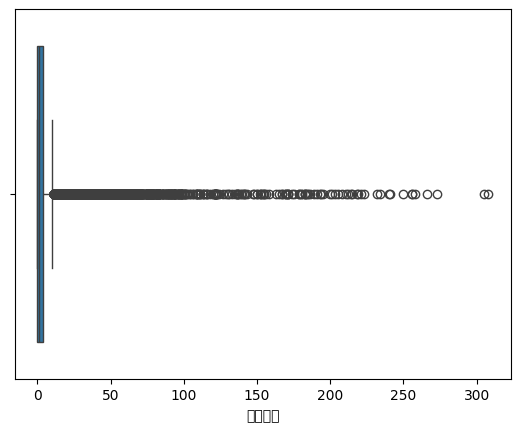

In [ ]:
#연속적 데이터(Box Plot)
sns.boxplot(data=df1, x='출고수량')
# 이미지 저장
plt.savefig('image2.png')  # 'boxplot.png'라는 이름으로 저장
files.download('image2.png')

7. '카테고리'에서 '헤어케어' 제품 중, '입고수량'이 높은 상위 50개 데이터를 추출하여 df2로 선언한 뒤, 상품명' 빈도수가 가장높은 3개 제품을 확인하고, 빈도수에 대한 그래프를 시각화하시오

In [ ]:
cond1=(df1['카테고리']=='헤어케어')
df1.loc[cond1]

,Unnamed: 0,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
2,2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19
6,6,2019-05-16,V2_17,8.801046e+12,발주가능,0,헤어케어,11
7,7,2019-05-16,V2_18,8.801046e+12,발주가능,120,헤어케어,15
16,16,2019-05-16,V2_38,8.801047e+12,발주가능,0,헤어케어,0
28,28,2019-05-16,V2_65,8.801046e+12,발주가능,0,헤어케어,0
...,...,...,...,...,...,...,...,...
14978,14978,2019-08-07,V2_418,1.880105e+13,발주가능,0,헤어케어,0
14979,14979,2019-08-07,V2_425,1.880105e+13,발주가능,0,헤어케어,0
14982,14982,2019-08-07,V2_449,1.880105e+13,발주가능,0,헤어케어,0
14983,14983,2019-08-07,V2_456,8.801046e+12,발주가능,40,헤어케어,1


In [30]:
df1.loc[cond1].sort_values(by='입고수량',ascending=False).head(50) #데이터 정렬이기에

,Unnamed: 0,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량


In [ ]:
df2=df1.loc[cond1].sort_values(by='입고수량',ascending=False).head(50) #데이터 정렬이기에

In [ ]:
df2['상품명'].value_counts().head(3)

,count
상품명,
V2_6,9
V2_84,8
V2_40,6


In [ ]:
top_products = df2['상품명'].value_counts().head(3)

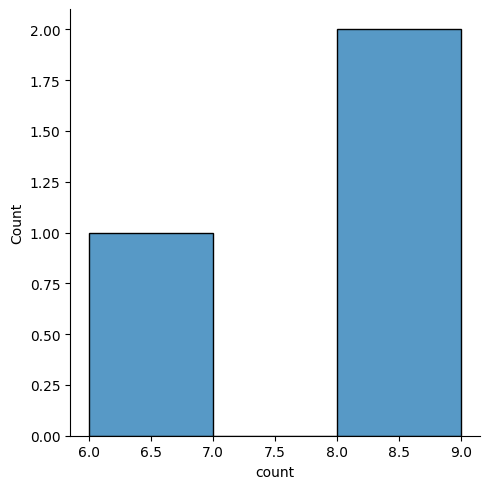

In [ ]:
sns.displot(top_products)

상품명' 빈도수가 가장높은 3개 제품을 확인하고, 빈도수에 대한 그래프를 시각화하시오

문자 데이터("object") 요약 통계량 확인

unique:항목수

top:최빈값,가장 빈도수 높은 항목

freq:최빈값 개수

:8. '카테고리'내 특정 항목을 입력하면, 해당 카테고리의 '상품명' 별 '출고수량'의 평균을 계
산하여 파일형태로 저장하고, 출고수량의 histogram을 시각화 하는 함수를 구성하시오.
(input 함수 활용



In [ ]:
!pip install plotly
import plotly.express as px #동적 시각화 라이브러리
import pandas as pd

In [29]:
df1['카테고리'].unique()

array(['세탁세제', '헤어케어', '주방세제', 'ST', 'F&B', '덴탈케어', '기타', '매입브랜드'],
      dtype=object)

In [31]:
category_input = input("카테고리를 입력하세요: ")
cond1=(df1['카테고리'] == category_input)
df1.loc[cond1]
p4=df1.loc[cond1].pivot_table(index='상품명',values=['출고수량'],aggfunc='mean').reset_index()
px.histogram(p4.loc[cond1],x='출고수량',color='상품명') #층별화

카테고리를 입력하세요: 세탁세제


카테고리 안에 상품명이 있고-> 출고수량을 구해라 잖아

In [ ]:
#cond1=(df1['카테고리'] == category_input)
#df1.loc[cond1]

In [ ]:
#cond1=(df1['카테고리'] == category_input)
#df1.loc[cond1]
#df1.loc[cond1].pivot_table(index='상품명',values=['출고수량'],aggfunc='mean').reset_index()

In [ ]:
fig1=px.histogram(p4.loc[cond1],x='출고수량',color='상품명')
fig1.write_html('image.html') #그래프를 상호작용 가능한 형태로 HTML 동적 파일 저장
files.download('image.html')

03_Data.xlsx데이터를 불러와, 데이터를 재구조화 한 뒤,df3로 선언하여, 아래와 같은 분
석을 실시하고자 한다.
9. df3 연속형 자료의 기술 통계량을 확인

In [36]:
import pandas as pd
import numpy as np

from google.colab import files
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

trian = pd.read_excel("/content/drive/MyDrive/DSA/03_Data.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# 데이터의 재구조화
df2 =pd.read_excel("/content/drive/MyDrive/DSA/03_Data.xlsx", skiprows=1)
df2.columns


Index([                   '구분',                 '카테고리명',
                        '자재그룹',                 '자재그룹명',
                         '제품명',                    '단위',
                          '판매',     2019-12-01 00:00:00,
           2020-10-01 00:00:00,     2020-11-01 00:00:00,
           2020-12-01 00:00:00, '2019-12-01 00:00:00.1',
       '2020-10-01 00:00:00.1', '2020-11-01 00:00:00.1',
       '2020-12-01 00:00:00.1', '2019-12-01 00:00:00.2',
       '2020-10-01 00:00:00.2', '2020-11-01 00:00:00.2',
       '2020-12-01 00:00:00.2', '2019-12-01 00:00:00.3',
       '2020-10-01 00:00:00.3', '2020-11-01 00:00:00.3',
       '2020-12-01 00:00:00.3',                  '안전재고',
                         ' 분류'],
      dtype='object')

In [40]:
df2_1 = df2.melt(id_vars=[ '구분','카테고리명','자재그룹','자재그룹명','제품명','단위','판매','안전재고',' 분류'] )
df3 = df2_1.rename(columns={'variable':'공급일자','value':'매출액',' 분류':'분류'})
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      640 non-null    object 
 1   카테고리명   640 non-null    object 
 2   자재그룹    640 non-null    int64  
 3   자재그룹명   640 non-null    object 
 4   제품명     640 non-null    object 
 5   단위      640 non-null    object 
 6   판매      640 non-null    float64
 7   안전재고    640 non-null    float64
 8   분류      640 non-null    object 
 9   공급일자    640 non-null    object 
 10  매출액     640 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 55.1+ KB


10. '분류'에서 'A'에 해당하는 제품을 뽑아 '매출액'의 평균과 중앙값의 차이를 계산

In [41]:
cond1=(df3['분류'] == 'A')
df3.loc[cond1]

,구분,카테고리명,자재그룹,자재그룹명,제품명,단위,판매,안전재고,분류,공급일자,매출액
2,구분,CHB,1687,친환경 바디워시,C,천원,10354.1,0.0,A,2019-12-01 00:00:00,9474.3
3,구분,CHB,1687,친환경 바디워시,D,천원,3543.3,0.0,A,2019-12-01 00:00:00,7702.6
4,구분,CHB,1687,친환경 바디워시,E,천원,234603.9,39593.3,A,2019-12-01 00:00:00,56309.6
5,구분,CHB,1687,친환경 바디워시,F,천원,3339.9,0.0,A,2019-12-01 00:00:00,3181.8
7,구분,CHB,1687,친환경 바디워시,H,천원,16520.3,46893.9,A,2019-12-01 00:00:00,26129.3
...,...,...,...,...,...,...,...,...,...,...,...
610,구분,CHB,1687,친환경 바디워시,K,천원,70159.2,0.0,A,2020-12-01 00:00:00.3,21014.0
611,구분,CHB,1687,친환경 바디워시,L,천원,6460.5,0.0,A,2020-12-01 00:00:00.3,8055.5
612,구분,CHB,1687,친환경 바디워시,M,천원,8893.0,0.0,A,2020-12-01 00:00:00.3,26497.5
617,구분,CHB,1687,친환경 바디워시,R,천원,0.0,0.0,A,2020-12-01 00:00:00.3,0.0


In [42]:
p5=df3.loc[cond1]
p5.pivot_table(index='분류',values=['매출액'],aggfunc=['mean','median']).reset_index()

,분류,mean,median
,,매출액,매출액
0,A,10257.3375,105.65


In [43]:
print("평균과 중앙값의 차이:", mean_difference)

평균과 중앙값의 차이: -3.9639629116487276


11. '매출액'이 높은 상위 100개 항목을 뽑아, df3_100으로 선언한 뒤, '제품명'의 빈도수를
확인 하시오



In [47]:
df3.sort_values(by='매출액',ascending=False).head(100)

,구분,카테고리명,자재그룹,자재그룹명,제품명,단위,판매,안전재고,분류,공급일자,매출액
604,구분,CHB,1687,친환경 바디워시,E,천원,234603.9,39593.3,A,2020-12-01 00:00:00.3,84967.2
124,구분,CHB,1687,친환경 바디워시,E,천원,234603.9,39593.3,A,2020-12-01 00:00:00,84690.1
524,구분,CHB,1687,친환경 바디워시,E,천원,234603.9,39593.3,A,2020-10-01 00:00:00.3,78268.0
44,구분,CHB,1687,친환경 바디워시,E,천원,234603.9,39593.3,A,2020-10-01 00:00:00,78268.0
564,구분,CHB,1687,친환경 바디워시,E,천원,234603.9,39593.3,A,2020-11-01 00:00:00.3,74942.2
...,...,...,...,...,...,...,...,...,...,...,...
191,구분,CHB,1687,친환경 바디워시,FF1,천원,291.3,0.0,E,2019-12-01 00:00:00.1,9198.8
128,구분,CHB,1687,친환경 바디워시,I,천원,11722.5,0.0,K,2020-12-01 00:00:00,8400.1
608,구분,CHB,1687,친환경 바디워시,I,천원,11722.5,0.0,K,2020-12-01 00:00:00.3,8400.1
125,구분,CHB,1687,친환경 바디워시,F,천원,3339.9,0.0,A,2020-12-01 00:00:00,8294.9


In [48]:
df3_100=df3.sort_values(by='매출액',ascending=False).head(100)

In [49]:
# '제품명' 열의 고유 값 개수 세기
product_counts = df3_100['제품명'].value_counts() #빈도수

# 결과 출력
print(product_counts)


제품명
E      8
FF3    8
A2     8
J      8
G      8
H      8
K      6
I      6
KC2    6
B3     6
FF1    4
C      4
L      4
KC3    4
Z1     2
B2     2
A3     2
M      2
Z2     2
F      2
Name: count, dtype: int64


12. df3에 '공급일자'데이터를 이용하여, '공급연도'라는 연도 데이터를 따로 추출

In [50]:
df3

,구분,카테고리명,자재그룹,자재그룹명,제품명,단위,판매,안전재고,분류,공급일자,매출액
0,구분,CHB,1687,친환경 바디워시,A,천원,0.0,0.0,E,2019-12-01 00:00:00,0.0
1,구분,CHB,1687,친환경 바디워시,B,천원,0.0,0.0,E,2019-12-01 00:00:00,0.0
2,구분,CHB,1687,친환경 바디워시,C,천원,10354.1,0.0,A,2019-12-01 00:00:00,9474.3
3,구분,CHB,1687,친환경 바디워시,D,천원,3543.3,0.0,A,2019-12-01 00:00:00,7702.6
4,구분,CHB,1687,친환경 바디워시,E,천원,234603.9,39593.3,A,2019-12-01 00:00:00,56309.6
...,...,...,...,...,...,...,...,...,...,...,...
635,구분,CHB,1687,친환경 바디워시,Z2,천원,5012.4,0.0,K,2020-12-01 00:00:00.3,1619.5
636,구분,CHB,1687,친환경 바디워시,Z3,천원,585.0,0.0,K,2020-12-01 00:00:00.3,3191.2
637,구분,CHB,1687,친환경 바디워시,KC,천원,0.0,0.0,E,2020-12-01 00:00:00.3,0.0
638,구분,CHB,1687,친환경 바디워시,KC2,천원,16636.2,0.0,L,2020-12-01 00:00:00.3,16845.8


# 문자열로 된 날짜
date_str = '2023-02-28'

# pd.to_datetime을 사용하여 변환
date_time = pd.to_datetime(date_str)

print(date_time)  # 출력: 2023-02-28 00:00:00

In [52]:
#pd.to_datetime은 Pandas 라이브러리에서 제공하는 함수로,
#문자열이나 다른 형식의 날짜 및 시간 데이터를 Pandas의 datetime 형식으로 변환하는 데 사용됩니다.
#이 함수는 날짜와 시간을 처리할 때 매우 유용하며,
#다양한 형식의 날짜 문자열을 인식하고 변환할 수 있습니다.
# '공급일자'를 datetime 형식으로 변환]
#split():특정 문자를 기준으로 데이터를 분할 하는 함수
def func1(x):
  return str(x).split(" ")[0] #0으로 지정해서 연도 나오게 함

df3['공급일자'].apply(func1).reset_index() #실제 데이터는 어렵기에 전처리 하는 법을 알아야함.apply를 사용하여 각 요소에 함수 적용
#apply을 왜 사용해야하는지 모르겠음

,index,공급일자
0,0,2019-12-01
1,1,2019-12-01
2,2,2019-12-01
3,3,2019-12-01
4,4,2019-12-01
...,...,...
635,635,2020-12-01
636,636,2020-12-01
637,637,2020-12-01
638,638,2020-12-01


In [53]:
# 연도 추출
df3['년도'] = df3['공급일자'].apply(func1)

# 2019년도와 2020년도 매출액 합계 계산
sales_summary = df3.pivot_table(index='분류', columns='년도', values='매출액', aggfunc='sum').reset_index()


print(sales_summary)


년도 분류  2019-12-01  2020-10-01  2020-11-01  2020-12-01
0   A    356379.4    522620.5    367534.9    558756.6
1   B     20564.1        40.0        40.0        40.0
2   E     27600.5     25160.4       345.8         0.0
3   F     19498.5     53197.4     44221.4     16541.8
4   G      1039.0      2356.8       240.8     23212.6
5   H         0.0     23928.4     16135.6     12836.4
6   K     88588.6     29239.1     49840.2     26421.6
7   L         0.0     38773.4     35167.8     33691.6
8   M    143063.8    126409.0     71853.6     98299.3


13. '분류'에 따른 '매출액' 합의 2019년도 대비 2020의 증감률 계산

In [81]:
p6=df3.pivot_table(index='분류',values=['매출액'],aggfunc='sum').reset_index() #분류에 따른 매출합
print(p6) #파생변수

  분류        매출액
0  A  1805291.4
1  B    20684.1
2  E    53106.7
3  F   133459.1
4  G    26849.2
5  H    52900.4
6  K   194089.5
7  L   107632.8
8  M   439625.7


In [82]:
#2019년도와 2020년도 매출액 합계 계산
sales_summary = df3.pivot_table(index='분류', columns='년도', values='매출액', aggfunc='sum').reset_index()
print(sales_summary) #파생변수

년도 분류  2019-12-01  2020-10-01  2020-11-01  2020-12-01
0   A    356379.4    522620.5    367534.9    558756.6
1   B     20564.1        40.0        40.0        40.0
2   E     27600.5     25160.4       345.8         0.0
3   F     19498.5     53197.4     44221.4     16541.8
4   G      1039.0      2356.8       240.8     23212.6
5   H         0.0     23928.4     16135.6     12836.4
6   K     88588.6     29239.1     49840.2     26421.6
7   L         0.0     38773.4     35167.8     33691.6
8   M    143063.8    126409.0     71853.6     98299.3


In [78]:
#두데이터 테이블 병합merge함수로 병합할 수 있음(기준컬럼 키컬럼),병합전략=how
m1=pd.merge(sales_summary, p6, on='분류', how='inner')
print(m1) #병합 파생변수

  분류  2019-12-01  2020-10-01  2020-11-01  2020-12-01        매출액
0  A    356379.4    522620.5    367534.9    558756.6  1805291.4
1  B     20564.1        40.0        40.0        40.0    20684.1
2  E     27600.5     25160.4       345.8         0.0    53106.7
3  F     19498.5     53197.4     44221.4     16541.8   133459.1
4  G      1039.0      2356.8       240.8     23212.6    26849.2
5  H         0.0     23928.4     16135.6     12836.4    52900.4
6  K     88588.6     29239.1     49840.2     26421.6   194089.5
7  L         0.0     38773.4     35167.8     33691.6   107632.8
8  M    143063.8    126409.0     71853.6     98299.3   439625.7


In [88]:
# 2019년도 매출액
m1_2019 = m1['2019-12-01']
print(M1_2019)
#2020년도
m1_2020 = (m1['2020-10-01'] + m1['2020-11-01'] + m1['2020-12-01']) / 3
print(m1_2020)

0    356379.4
1     20564.1
2     27600.5
3     19498.5
4      1039.0
5         0.0
6     88588.6
7         0.0
8    143063.8
Name: 2019-12-01, dtype: float64
0    482970.666667
1        40.000000
2      8502.066667
3     37986.866667
4      8603.400000
5     17633.466667
6     35166.966667
7     35877.600000
8     98853.966667
dtype: float64


In [91]:
# 증감률 계산
growth_rate = ((m1_2020 - m1_2019) / m1_2019) * 100
print(growth_rate) #증감률=(최종수치-최소수치/최소수치)*100

0     35.521488
1    -99.805486
2    -69.195969
3     94.819431
4    728.046198
5           inf
6    -60.303056
7           inf
8    -30.902180
dtype: float64


In [95]:
# 증감률을 데이터프레임에 추가하고 열 이름 변경
m1['증감률 (%)'] = growth_rate
m1['증감률 (%)']

,증감률 (%)
0,35.521488
1,-99.805486
2,-69.195969
3,94.819431
4,728.046198
5,inf
6,-60.303056
7,inf
8,-30.902180


14. Pandas의 quantile함수를 활용해서, '매출액'이 상위 75%이상인 데이터를 A / 미만인 데
이터를 B로 선언하여, '판매구분'이라는 변수로 선언


In [106]:
#quantile 함수는 사분위수
df3.describe()
# '매출액'의 75% 분위수 계산
quantile_75 = df3['매출액'].quantile(0.75)
print(quantile_75)

492.42499999999995


In [109]:
df3['판매구분'] = df3['매출액'].apply(lambda x: 'A' if x >= quantile_75 else 'B')
print(df3)
#apply() 메서드: DataFrame의 특정 열이나 행에 함수를 적용하는 데 사용됩니다. 여기서는 특정 열에 대해 적용되고 있습니다.
#lambda x: 'A' if x >= quantile_75 else 'B': 이 부분은 익명 함수(람다 함수)를 정의합니다. 이 함수는 입력값 x를 받아서, x가 quantile_75(75번째 백분위수)보다 크거나 같으면 'A'를 반환하고, 그렇지 않으면 'B'를 반환합니다.
#print(df3): 최종적으로 수정된 DataFrame df3를 출력합니다.
#따라서 이 코드는 DataFrame의 특정 열의 각 값에 대해 75번째 백분위수와 비교하여, 그 값이 75번째 백분위수 이상이면 'A'로, 그렇지 않으면 'B'로 변경하는 작업을 수행합니다.
#예를 들어, quantile_75가 10이라면, DataFrame의 값이 10 이상인 경우 'A'로, 10 미만인 경우 'B'로 설정됩니다.

     구분 카테고리명  자재그룹     자재그룹명  제품명  단위        판매     안전재고 분류  \
0    구분   CHB  1687  친환경 바디워시    A  천원       0.0      0.0  E   
1    구분   CHB  1687  친환경 바디워시    B  천원       0.0      0.0  E   
2    구분   CHB  1687  친환경 바디워시    C  천원   10354.1      0.0  A   
3    구분   CHB  1687  친환경 바디워시    D  천원    3543.3      0.0  A   
4    구분   CHB  1687  친환경 바디워시    E  천원  234603.9  39593.3  A   
..   ..   ...   ...       ...  ...  ..       ...      ... ..   
635  구분   CHB  1687  친환경 바디워시   Z2  천원    5012.4      0.0  K   
636  구분   CHB  1687  친환경 바디워시   Z3  천원     585.0      0.0  K   
637  구분   CHB  1687  친환경 바디워시   KC  천원       0.0      0.0  E   
638  구분   CHB  1687  친환경 바디워시  KC2  천원   16636.2      0.0  L   
639  구분   CHB  1687  친환경 바디워시  KC3  천원   18871.3      0.0  F   

                      공급일자      매출액          년도 판매구분  
0      2019-12-01 00:00:00      0.0  2019-12-01    B  
1      2019-12-01 00:00:00      0.0  2019-12-01    B  
2      2019-12-01 00:00:00   9474.3  2019-12-01    A  
3      2019

15. '판매구분'에 따른 '매출액'의 '평균'/'표준편차'를 계산 하시오.판매와 구분을 합치고 매출액의 평균과 표준편차를 구해라

In [110]:
df3.pivot_table(index='판매구분',values=['매출액'],aggfunc=['mean','std']).reset_index()

,판매구분,mean,std
,,매출액,매출액
0,A,17652.750625,17799.249363
1,B,19.164167,67.216824
